Loading test data...
Generating predictions...
Success! Final submission file saved as: final_submission_full.csv


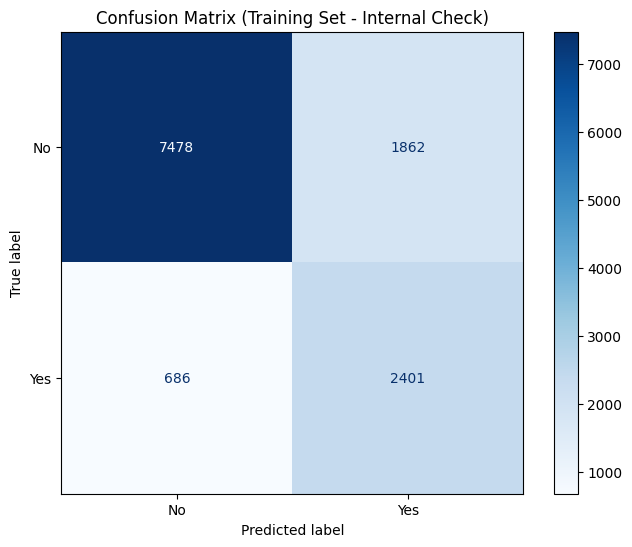

Confusion matrix saved as 'confusion_matrix.png' for your report.

PROJECT SUMMARY FOR PRESENTATION
Chosen Model: XGBoost
Strategy: Applied scale_pos_weight=3 to handle class imbalance.
Total Test Observations: 3308
Predicted 'Yes' (Job Changers): 1067
Predicted 'No' (Stayers): 2241


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer

# LOAD AND PREPROCESS TEST DATA
print("Loading test data...")
test = pd.read_csv('job_change_test.csv')
test_ids = test['id']

# Assuming professional_preprocess is defined in your environment
test_cleaned = professional_preprocess(test)

# Ensure test features match training features
X_test = test_cleaned.drop(['id'], axis=1)

# GENERATE FINAL PREDICTIONS
print("Generating predictions...")
test_preds = final_model.predict(X_test)

# FORMATTING FOR SUBMISSION
submission = pd.DataFrame({
    'id': test_ids,
    'willing_to_change_job': pd.Series(test_preds).map({1: 'Yes', 0: 'No'})
})

submission_filename = 'final_submission_full.csv'
submission.to_csv(submission_filename, index=False)
print(f"Success! Final submission file saved as: {submission_filename}")

# EXTRA FOR PRESENTATION: CONFUSION MATRIX
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions for the internal check
y_train_pred = final_model.predict(X)
cm = confusion_matrix(y, y_train_pred)

# Fixed plotting: Create subplots to avoid the "0 Axes" empty figure error
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', ax=ax) # Explicitly pass the axis

plt.title("Confusion Matrix (Training Set - Internal Check)")
plt.savefig('confusion_matrix.png')
plt.show() # Displaying the plot in the notebook/console
print("Confusion matrix saved as 'confusion_matrix.png' for your report.")

# SUMMARY OF RESULTS
print("\n" + "="*30)
print("PROJECT SUMMARY FOR PRESENTATION")
print(f"Chosen Model: XGBoost")
print(f"Strategy: Applied scale_pos_weight=3 to handle class imbalance.")
print(f"Total Test Observations: {len(submission)}")
print(f"Predicted 'Yes' (Job Changers): {submission['willing_to_change_job'].value_counts().get('Yes', 0)}")
print(f"Predicted 'No' (Stayers): {submission['willing_to_change_job'].value_counts().get('No', 0)}")
print("="*30)

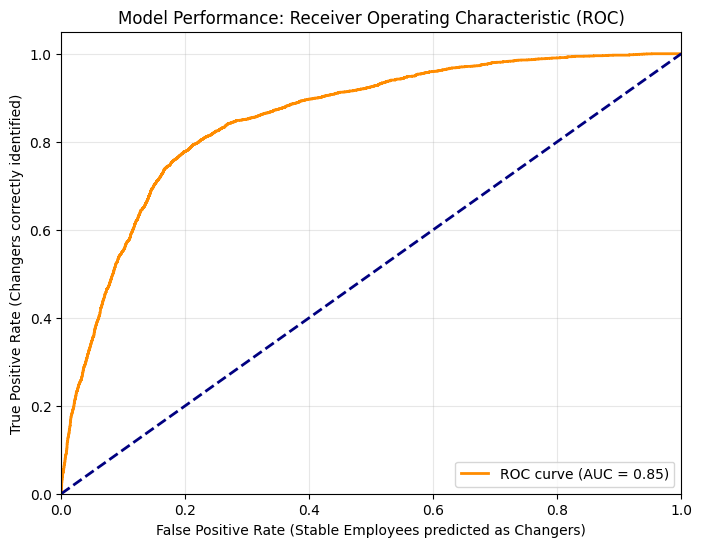

The model's AUC Score is: 0.8524


In [4]:
from sklearn.metrics import roc_curve, auc

# 1. GET PREDICTED PROBABILITIES
# We need the continuous probability scores rather than just the 0/1 predictions
y_probs = final_model.predict_proba(X)[:, 1]

# 2. CALCULATE ROC AND AUC
fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

# 3. PLOT THE ROC CURVE
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Baseline (Random Guess)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Stable Employees predicted as Changers)')
plt.ylabel('True Positive Rate (Changers correctly identified)')
plt.title('Model Performance: Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('roc_curve.png')
plt.show()

print(f"The model's AUC Score is: {roc_auc:.4f}")